# PCA analiza

In [9]:
import pandas as pd
import numpy as np

data = pd.read_excel("data.xlsx")
data.drop(data.filter(regex="Unname"),axis=1, inplace=True)

X = data.drop("responder", axis=1)
y = data["responder"]

manjkajoce = X.isnull().sum()
meja = 0.2
for col in X.columns:
    if manjkajoce[col] > 0:
        # Imputiramo manjkajoče vrednosti
        if manjkajoce[col] < len(X)*meja:
            if X[col].dtype == 'float64':
                X[col].fillna(X[col].mean(), inplace=True)
            else:
                X[col].fillna(X[col].mode()[0], inplace=True)
        # ali pa stolpcec zavržemo
        else:
            X.drop(col, axis=1, inplace=True)

X = pd.DataFrame(X).to_numpy()
y = pd.DataFrame(y).to_numpy()

from operator import add
from functools import reduce

y = [reduce(add, lst) for lst in y]
y = np.array(y)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns 

Skaliramo podatke

In [13]:
from sklearn.preprocessing import StandardScaler

x_scaled = StandardScaler().fit_transform(X)

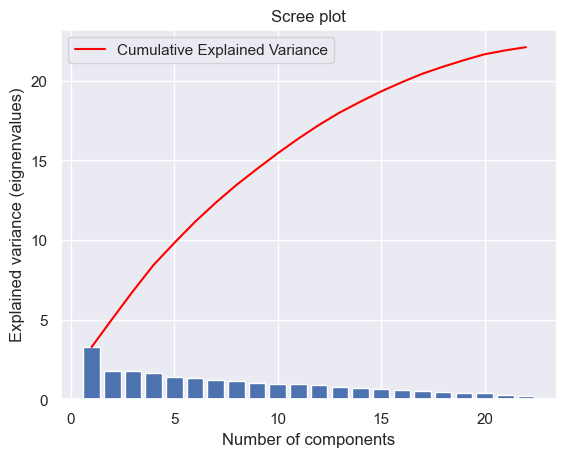

In [32]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
 
from sklearn.decomposition import PCA
sns.set()
 
# Reduce from 22 to 5 features with PCA
pca = PCA(n_components=None)
 
# Fit and transform data
reduced_features = pca.fit_transform(x_scaled)
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
plt.plot(
    range(1,len(pca.explained_variance_ )+1),
    np.cumsum(pca.explained_variance_),
    c='red',
    label='Cumulative Explained Variance')
 
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')
 
plt.show()

## 2D vizualizacija

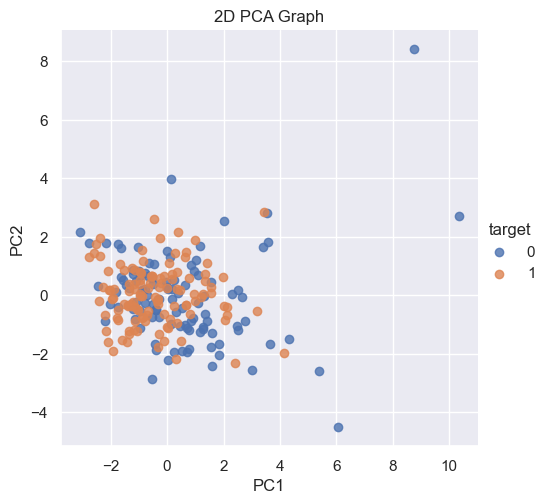

In [40]:
# Reduce from 4 to 2 features with PCA
pca = PCA(n_components=2)
 
# Fit and transform data
pca_features = pca.fit_transform(x_scaled)
 
# Create dataframe
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2'])

pca_df['target'] = y
 

import seaborn as sns
sns.set()
 
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df,
    hue='target',
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')
plt.show()